In [1]:
#225229113
#Harishmitha

### Steps 

#### 1. Dataset Creation 

Create a dataset of closely cropped Black Panther and Jaguar ,10 images per class and store them in seperate folders.

#### 2. Pre-processing 

Read the images using OpenCV,format their height and width etc 

In [2]:
import warnings
warnings.filterwarnings("ignore")
import time
from time import process_time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense

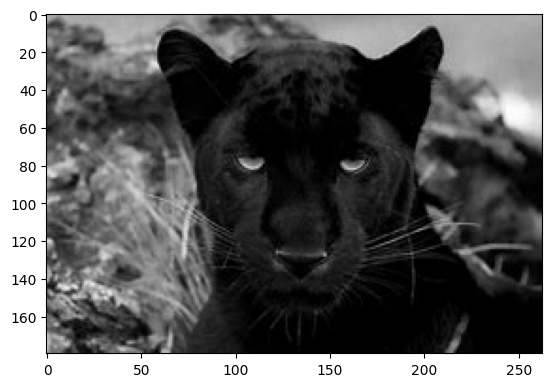

In [4]:
datadir ="Image"
categories =['jaguar']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [5]:
datadir = "Image"
categories = ['jaguar', 'black panther']

In [6]:
data = []
img_size=500

def preprocess():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            num_array = cv2.resize(img_array,(img_size, img_size))
            
            data.append([num_array, class_num])
preprocess()

In [7]:
print(len(data))

20


#### 3. Dataset Preparation 

Split the dataset (75% training and 25% testing) into training and testing tests with images as input X,image class as target label Y 

In [9]:
X = []
y = []
for features,label in data:
    X.append(features)
    y.append(label)
    
X = np.asarray(X).reshape(-1,img_size,img_size,1)
y = np.asarray(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
print("Shape of the following:")
print("X_train =", X_train.shape, "\nX_test =", X_test.shape, "\ny_train =", y_train.shape, "\ny_test =", y_test.shape)

Shape of the following:
X_train = (15, 500, 500, 1) 
X_test = (5, 500, 500, 1) 
y_train = (15,) 
y_test = (5,)


#### 4. Model Creation 

Train a single layer neural network model (using keras) for 100 epochs.

In [18]:
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(loss='mean_squared_error', metrics=['binary_accuracy'])

In [20]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.4252 - binary_accuracy: 0.4667 - val_loss: 0.3437 - val_binary_accuracy: 0.5961
Epoch 2/100
1/1 [==============================] - 1s 668ms/step - loss: 0.4130 - binary_accuracy: 0.4762 - val_loss: 0.3352 - val_binary_accuracy: 0.5961
Epoch 3/100
1/1 [==============================] - 1s 676ms/step - loss: 0.3997 - binary_accuracy: 0.4762 - val_loss: 0.3250 - val_binary_accuracy: 0.5961
Epoch 4/100
1/1 [==============================] - 1s 690ms/step - loss: 0.3830 - binary_accuracy: 0.4762 - val_loss: 0.3107 - val_binary_accuracy: 0.5947
Epoch 5/100
1/1 [==============================] - 1s 714ms/step - loss: 0.3598 - binary_accuracy: 0.4770 - val_loss: 0.2861 - val_binary_accuracy: 0.5934
Epoch 6/100
1/1 [==============================] - 1s 698ms/step - loss: 0.3233 - binary_accuracy: 0.4780 - val_loss: 0.2483 - val_binary_accuracy: 0.5893
Epoch 7/100
1/1 [==============================] - 1s 682ms/step - loss: 

In [21]:
model.evaluate(X_train, y_train)

1/1 [==============================] - 0s 217ms/step - loss: 0.2510 - binary_accuracy: 0.5065


[0.2509903013706207, 0.5064759850502014]

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 16        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


#### 5. Performance Analysis

a. Run different single layer Neural Network models with image sizes as 500 x 500, 100 x 100, 50 x 50, 25 x 25, 10 x 10
(use OpenCV for resizing within code i.e. do not use MS Paint) and the number of nodes as 8,16,32,64,128,256,512 and 1028.
For all the models plot the number of parameters learned,training accuracy,testing accuracy and running time for testing in bar 
chart.

In [ ]:
def performance_analysis(datadir, categories, img_size, nodes):
    df_results = pd.DataFrame(data=np.zeros(shape=(0, 5)),
                              columns = ['Img size','Nodes Number','Accuracy','Loss','Train
training_data = []
for category in categories:
path = os.path.join(datadir,category)
class_num = categories.index(category)
for img in os.listdir(path):
img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
num_array=cv2.resize(img_array,(img_size,img_size))
training_data.append([num_array,class_num])
X=[]
y=[]
for features,label in training_data:
X.append(features)
y.append(label)
X=np.asarray(X).reshape(-1,img_size,img_size,1)
y=np.asarray(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)
count = 0
t_start = process_time()
model = Sequential()
model.add(Dense(nodes, input_dim=1, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error', metrics=['binary_accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)
t_stop = process_time()
t_elapsed = t_stop - t_start
score = model.evaluate(X_test,y_test)
count+=1
df_results.loc[count,'Img size'] = img_size
df_results.loc[count,'Nodes Number'] = nodes
df_results.loc[count,'Accuracy'] = score[1]
df_results.loc[count,'Loss'] = score[0]
df_results.loc[count,'Training time'] = t_elapsed
return df_results

In [ ]:
def evaluation():
m1 = performance_analysis("Image", ['jaguar', 'black panther'], 500, 8)
m2 = performance_analysis("Image", ['jaguar', 'black panther'], 500, 16)
m3 = performance_analysis("Image", ['jaguar', 'black panther'], 500, 32)
m4 = performance_analysis("Image", ['jaguar', 'black panther'], 500, 64)
m5 = performance_analysis("Image", ['jaguar', 'black panther'], 100, 8)
m6 = performance_analysis("Image", ['jaguar', 'black panther'], 100, 16)
m7 = performance_analysis("Image", ['jaguar', 'black panther'], 100, 32)
m8 = performance_analysis("Image", ['jaguar', 'black panther'], 100, 64)
m9 = performance_analysis("Image", ['jaguar', 'black panther'], 50, 8)
m10 = performance_analysis("Image", ['jaguar', 'black panther'], 50, 16)
m11 = performance_analysis("Image", ['jaguar', 'black panther'], 50, 32)
m12 = performance_analysis("Image", ['jaguar', 'black panther'], 50, 64)
m13 = performance_analysis("Image", ['jaguar', 'black panther'], 25, 8)
m14 = performance_analysis("Image", ['jaguar', 'black panther'], 25, 16)
m15 = performance_analysis("Image", ['jaguar', 'black panther'], 25, 32)
m16 = performance_analysis("Image", ['jaguar', 'black panther'], 25, 64)
m17 = performance_analysis("Image", ['jaguar', 'black panther'], 10, 8)
m18 = performance_analysis("Image", ['jaguar', 'black panther'], 10, 16)
m19 = performance_analysis("Image", ['jaguar', 'black panther'], 10, 32)
m20 = performance_analysis("Image", ['jaguar', 'black panther'], 10, 64)
df = pd.concat([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20]
return df

In [ ]:
evaluation()

b. Run different Neural Network models with number of layers as 2,3,4,5,each layer with 32 nodes. For all the models plot the 
number of parmeters learned,training accuracy,testing accuracy and running time for testing in bar chart.Analyse the results 
and discuss what you discovered!

In [ ]:
#2 layer
training_data = []
img_size=500
def create_training_data():
for category in categories:
path = os.path.join(datadir,category)
class_num = categories.index(category)
for img in os.listdir(path):
img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
num_array=cv2.resize(img_array,(img_size,img_size))
training_data.append([num_array,class_num])
create_training_data()

x=[]
y=[]
for features,label in training_data:
x.append(features)
y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)
model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
optimizer='adam',
metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
#3 layer
training_data = []
img_size=500
def create_training_data():
for category in categories:
path = os.path.join(datadir,category)
class_num = categories.index(category)
for img in os.listdir(path):
img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
num_array=cv2.resize(img_array,(img_size,img_size))
training_data.append([num_array,class_num])
create_training_data()

x=[]
y=[]
for features,label in training_data:
x.append(features)
y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)
model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
#4 layer
training_data = []
img_size=500
def create_training_data():
for category in categories:
path = os.path.join(datadir,category)
class_num = categories.index(category)
for img in os.listdir(path):
img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
num_array=cv2.resize(img_array,(img_size,img_size))
training_data.append([num_array,class_num])
create_training_data()

x=[]
y=[]
for features,label in training_data:
x.append(features)
y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)
model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
#5 layer
training_data = []
img_size=500
def create_training_data():
for category in categories:
path = os.path.join(datadir,category)
class_num = categories.index(category)
for img in os.listdir(path):
img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
num_array=cv2.resize(img_array,(img_size,img_size))
training_data.append([num_array,class_num])
create_training_data()

x=[]
y=[]
for features,label in training_data:
x.append(features)
y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)
model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=

In [ ]:
model.evaluate(x_test,y_test)